In [53]:
# alors hna derna les importantions necessaires 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [54]:
#hna hatina les datasets fdes variables train and test 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
#petite description 3la les colonnes (chhal keyn, moyenne t3hom,ecart-type ,minimum,maximum ,pourcentage ...ect)
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [56]:
#hna chefna infos 3la train (juste les colonnes chhal mn colonne non null... + type t3 chaque colonne )
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EXPLORATORY DATA ANALYSIS

<Axes: xlabel='Survived', ylabel='count'>

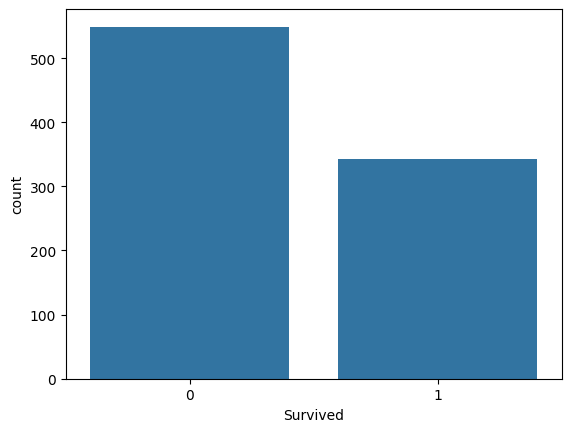

In [57]:
#hna dkhlna fesah bdina nchofo la DESTRIBUTION wla NATURE t3 target t3na (survived)
sns.countplot(train,x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

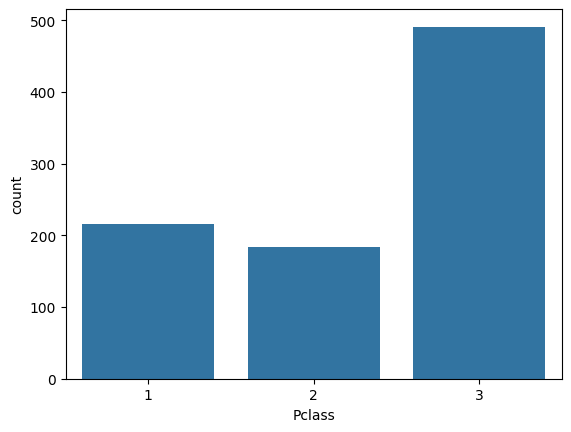

In [58]:
#chefna aussi la nature wla destribution t3 Pclass , alors 3lach hadi bedat chefnaha direct mor target pssk sathyan(sans calcules), hadi litban 3ndha 3ala9a plus m3a target
sns.countplot(train, x='Pclass')

<Axes: xlabel='SibSp', ylabel='count'>

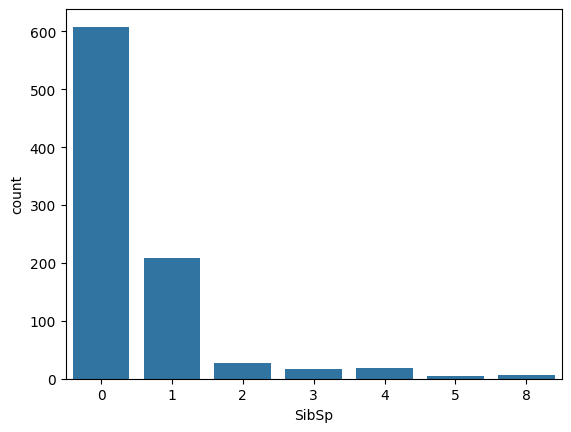

In [59]:
#aussi hadi partiellement tban 3ndha une relation m3a target (dapres dataset explication from kaggle this is the number of possible siblings likano m3a chaque personne a bord )
sns.countplot(train, x='SibSp')

<Axes: xlabel='Parch', ylabel='count'>

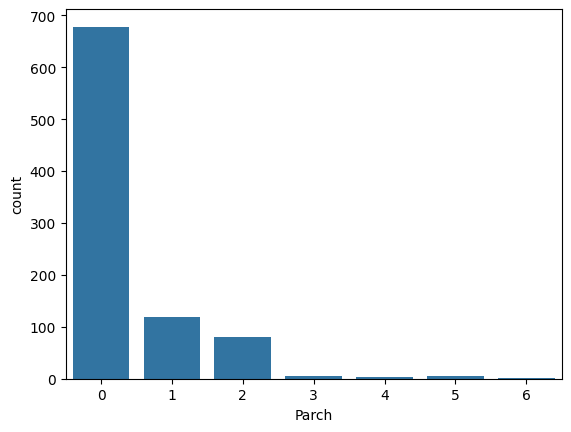

In [60]:
#kiktchebeh leli 9blha hadi juste que cest le nbr des parents/enfants
sns.countplot(train, x='Parch')


<Axes: xlabel='Embarked', ylabel='count'>

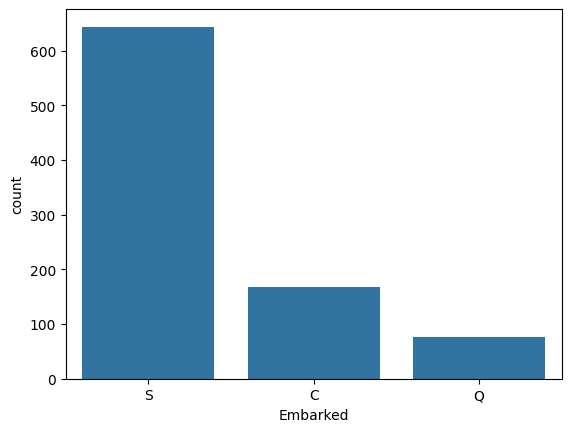

In [61]:
#embarked ana perso je pense que lazem tetnaha apres mais en gros en se regale de sa dispertion 
sns.countplot(train, x='Embarked')

alors wesh chefna 9bel cest les distributions t3 les variables qualitatives de notre dataset 

## numerical attributes

<Axes: xlabel='Age', ylabel='Density'>

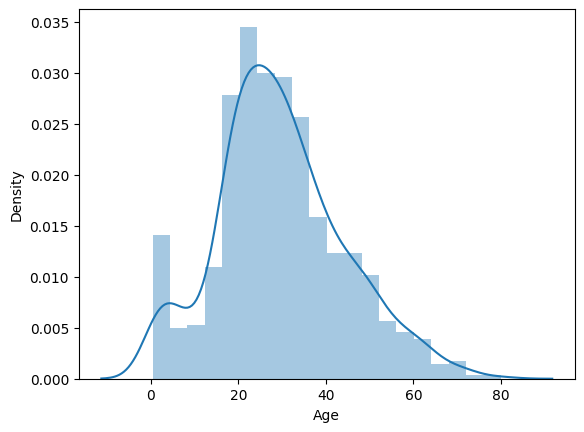

In [62]:
#toujours rana nchofo tawzi3 t3 les variables quantitatives cette fois pour mieux comprendre leurs relations m3a target
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

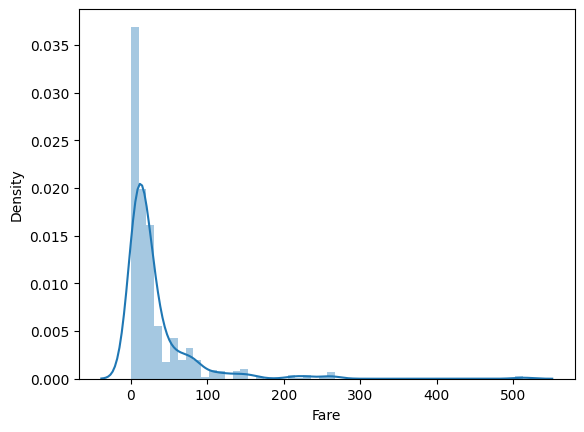

In [63]:
sns.distplot(train['Fare'])

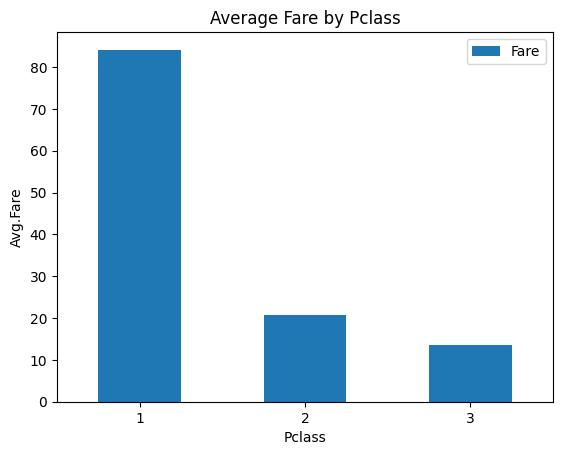

In [64]:
# alors ici cest unpeu interessant parceque hna rna nchofo destribution t3 la pclasse m3a la moyenne t3 colonne fare pour comprendre mieux leurs relattions
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0) #ybdl rotation t3 numerowat (chekla felha9)
plt.title('Average Fare by Pclass')
plt.show()

# conclusion rana nchofo bli li kano en premiere clase homa likhalso ktr 2 emme classe khalso moins mais plus que la troisiemme classe 

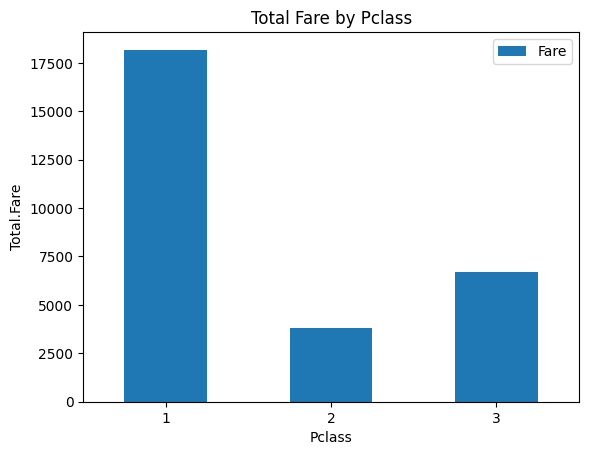

In [65]:
#difference entre li9bl hadi whadi cest que hna rana nchofo relation mabin pclass et le total de la colonne fare
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total.Fare')
plt.xticks(rotation=0) #ybdl rotation t3 numerowat (chekla felha9)
plt.title('Total Fare by Pclass')
plt.show()

# lwla cest la somme moyenne du tarif paye par chaque personne de chaque classe wzawja cest la somme total paye des tatifs de chaque classe
 jpense kharjetna 3la lmawdo3 chwya hadi mais rah 3ndna une idee plus detaille 3la la distribution de ces deux variables

<Axes: xlabel='Pclass', ylabel='Fare'>

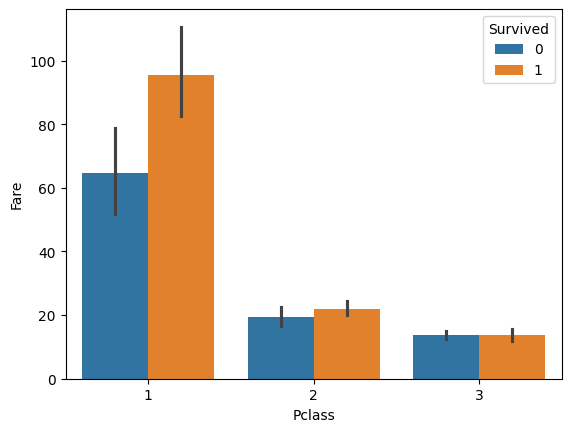

In [66]:
#relation importante entre le target(survived) et chhal khalas bnadem 
sns.barplot(data=train, x='Pclass',y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

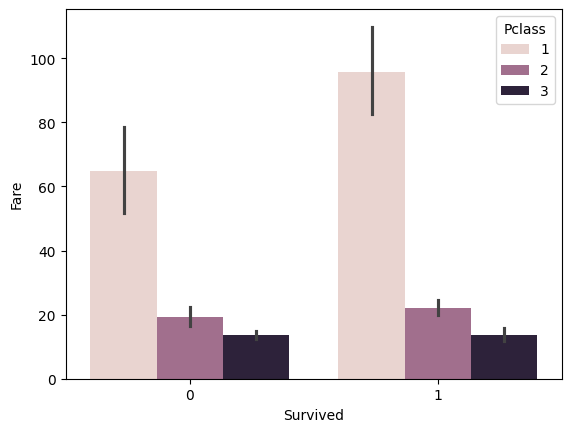

In [67]:
#hadi juste un essaie win glebna bin x wel hue (le type wla distribution t3o) fhad le cas cest pas tres utile mais rana nchofo
sns.barplot(data=train, x='Survived',y='Fare', hue='Pclass')

## data preprocessing

alors hna zedna dkhalna bien fla data wbel ma3lomat li ktasebnahom mn9bl (dirasa 3la les variables qualitatives w quantitatives) nhwso kifech nmenimiso w nencodo la data importante t3na

In [68]:
#concatenina train m3a test , pourquoi? hhhhhhhhhh 3labali ghadi ts9asi .... tout simplement parceque bch t3awnna mnb3d fles cells jayin ngl3o les vsaleurs nulles wndiro la normalisation t3 les valeurs
train_len = len(train)
df = pd.concat([train,test], axis=0)
df = df.reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
#display tali t3 dataset
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [70]:
# find the null values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [71]:
#dropping columns
df =  df.drop(columns=['Cabin'], axis = 1)

In [72]:
# fill missing values using mean of that numerical column
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [73]:
#hadi hwsna biha 3la la valeur li t3awdet bezzaf fhad colonne (differente 3la moyene)
df['Embarked'].mode()[0]

'S'

In [74]:
# 3mrna missing values bla moyenne 
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])

## log transformation for uniform data distributon

<Axes: xlabel='Fare', ylabel='Density'>

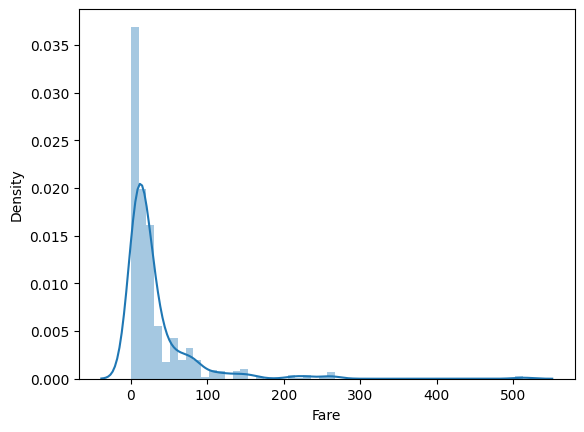

In [75]:
#hna rana nchofo la densite t3 fair 
sns.distplot(train['Fare'])

In [76]:
#applikina log bch la variale tetuniforma 
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

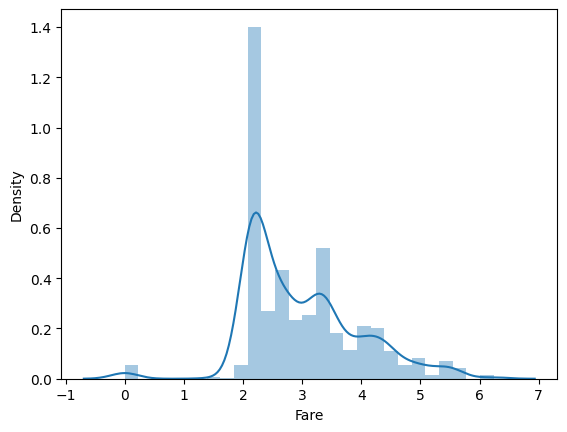

In [77]:
#resultat apres application du log
sns.distplot(df['Fare'])

## Correlation Matrix

<Axes: >

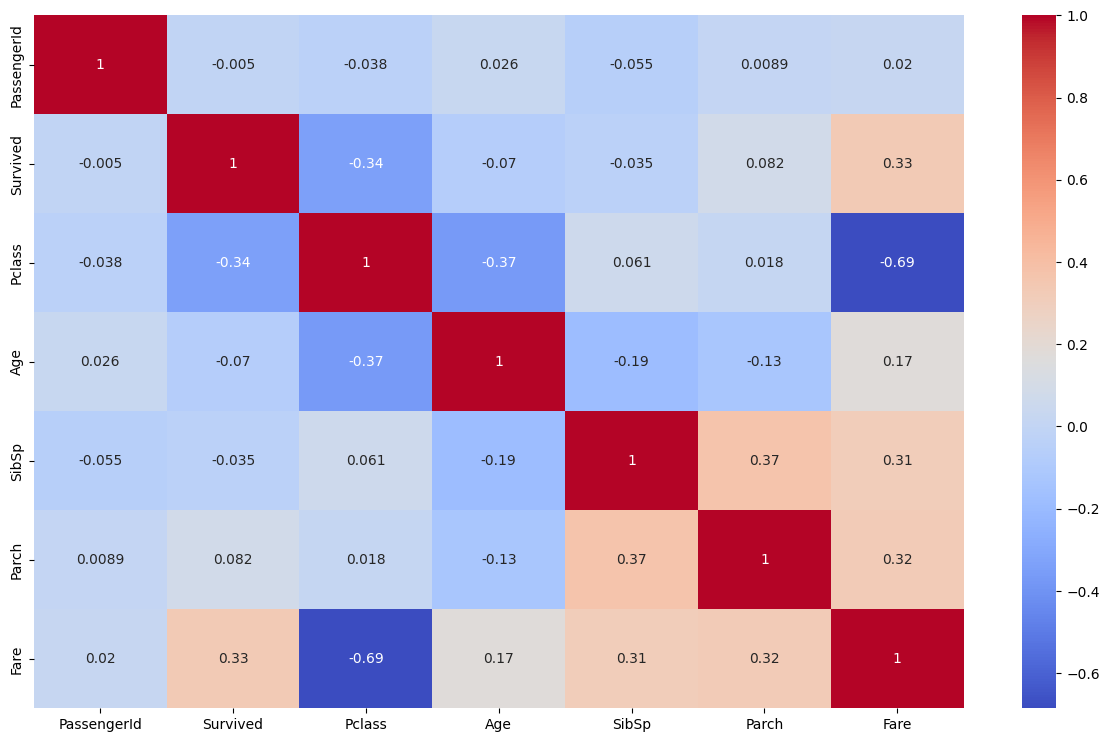

In [78]:
#bon hna sna3t copie t3 dataset bch nnjm ndropi les valeurs li fihom string bla meytdropaw f dataset originale pssk nehtasjhom mnba3d + sns.heatmap() ma9bltlich df bla mandropi les valeurs li fihom string
df1 = df.copy()
df1 =  df1.drop(columns=['Name'], axis = 1)
df1 =  df1.drop(columns=['Ticket'], axis = 1)
df1 =  df1.drop(columns=['Sex'], axis = 1)
df1 =  df1.drop(columns=['Embarked'], axis = 1)

corr = df1.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
#CORRELATION MATRIX TBEYNENA 3ALA9A T3 GA3 LES VARIABLES M3A TARGET WHICH IS VERY IMPORTANT FOR THE CREATION OF THE ML 

In [79]:
#head t3 df t3na 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S


In [80]:
## drop unnecessary columns
#we will drop passenger id later pssk nahtajoh mnb3d ghi fel verification bch nchofo esque train test tesplitaw nichan wla la (lazem train ykon fiha 891 passenger wlokhra fiha mel 892 hta 1309)
df = df.drop(columns=['Name','Ticket'], axis = 1)

In [81]:
#head t3 df t3na mor ma dropina les variables li banona m3ndhom hta 3ala9a m3a target (passengerid and embarkedfor example)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


## Label Encoding

In [82]:
#here codit colonne sex w embarked roditha numerique 
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


# train-test split

In [83]:
#hna 3wdna 9asemna la data  train_len= taille t3 train.csv rani deyrha lfog min concatenit
train = df.iloc[:train_len, :]
#3wdna fera9nahom kima kano train.csv rahi ftrain pssk rani nedi mel la valeur lwla ga3 hta la valeur talia t3 train wli hya en gros train
test = df.iloc[train_len:, :]
#test.csv rahi f test pssk la valeur lwla hya la valeur lirahi direct mor la valeur talia t3 train hta talli weli hya en gros test

In [84]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,2
1,2,1.0,1,0,38.0,1,0,4.280593,0
2,3,1.0,3,0,26.0,0,0,2.188856,2
3,4,1.0,1,0,35.0,1,0,3.990834,2
4,5,0.0,3,1,35.0,0,0,2.202765,2


In [85]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


alors golna bli derna had chi juste bch n3mro les valeurs manquantes t3 age fare w embarked (les variables li3ndhom relation m3a target) w numeruso les valeurs linahtajohom fl train w test 
konna nenjmo ndiro had swlh separately dans train w test mais i think the way we did it is better especially on our case

In [86]:
# input split
x = train.drop(columns=['PassengerId','Survived'], axis=1)
y = train['Survived']
#bon hna passengerid m3ndna mandiro biha wrah ndkhlo fel model training so by by ;)

In [87]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


## Model Training

In [88]:
# x_train fiha training data input and y_train fiha training data output
#dont confuse x_test and y_test with test maranach ntocho test rana ghi ntesto b une copie t3 test m3a tali bch nchofo resultat
from sklearn.model_selection import train_test_split , cross_val_score
#classify column
def classify(model,x,y):
    x_train , x_test, y_train , y_test = train_test_split(x,y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    
    score = cross_val_score(model, x , y, cv=5)
    print('CV Score:', np.mean(score))

In [89]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,x,y)

Accuracy: 0.8071748878923767
CV Score: 0.7833971502102819


In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,x,y)

Accuracy: 0.7219730941704036
CV Score: 0.7688469022660221


In [91]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model,x,y)

Accuracy: 0.7937219730941704
CV Score: 0.8047391877471595


In [92]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model,x,y)

Accuracy: 0.7892376681614349
CV Score: 0.7968928504174252


In [93]:
from xgboost import XGBClassifier
model = XGBClassifier()
classify(model,x,y)

Accuracy: 0.7847533632286996
CV Score: 0.8148327160881301


In [94]:
#bon hada mabghach y3tini accuracy jcp 3lah jpense hada howa li y3ti second best accuracy fhad le cas
from  lightgbm import LGBMClassifier
model = LGBMClassifier()
classify(model,x,y)


[LightGBM] [Info] Number of positive: 253, number of negative: 415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378743 -> initscore=-0.494889
[LightGBM] [Info] Start training from score -0.494889
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [95]:
# meilleur score hada howa 
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=0)
classify(model,x,y)

Accuracy: 0.8295964125560538
CV Score: 0.8226790534178645


## Complete Model Training with Full Data

In [96]:
model = CatBoostClassifier(verbose=0)
model.fit(x,y)

In [97]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,1
892,893,NaN,3,0,47.0,1,0,2.079442,2
893,894,NaN,2,1,62.0,0,0,2.369075,1
894,895,NaN,3,1,27.0,0,0,2.268252,2
895,896,NaN,3,0,22.0,1,1,2.586824,2


In [98]:
# input split
x_test = test.drop(columns=['PassengerId','Survived'], axis=1)


In [99]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


In [100]:
#the model here is catboost because it gave the best accuracy regarding my case
pred = model.predict(x_test)
pred

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

## test submission

In [101]:
sub = pd.read_csv('submission.csv')

In [102]:
sub['Survived'] = pred

In [103]:
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0


In [104]:
sub.to_csv('submission.csv',index=False)